In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Ngày,Giá điều chỉnh,Giá đóng cửa,Thay đổi,Khối lượng khớp lệnh,Giá trị khớp lệnh,KL thoả thuận,GT thoả thuận,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,14/12/2023,32.0,32.0,0(0.00 %),15658600,504492000000,0,0,32.5,32.50,31.9
1,13/12/2023,32.0,32.0,-0.6(-1.84 %),21549400,700751000000,982000,32013200000,32.9,32.95,32.0
2,12/12/2023,32.6,32.6,-0.1(-0.31 %),12453800,406841000000,1500001,48975030450,32.8,33.00,32.5
3,11/12/2023,32.7,32.7,0.1(0.31 %),19996900,649302000000,25001,815030350,32.6,33.05,32.1
4,08/12/2023,32.6,32.6,-0.25(-0.76 %),18079900,591368000000,1,30600,32.7,33.00,32.3


## Câu hỏi 1:

### 1.1 Nội dung câu hỏi
Quan sát sự biến động của Khối lượng khớp lệnh, Giá trị khớp lệnh cũng như Giá trị trung bình của một cổ phiếu hoặc hợp đồng tài chính trong ngày.

### 1.2 Lợi ích khi trả lời câu hỏi:
- Hiểu được biến động của thị trường giao dịch theo thời gian.
- Dự đoán thị trường giao dịch trong tương lai theo xu hướng thay đổi trong quá khứ.

### 1.3 Nguồn cảm hứng của câu hỏi
Nhóm tự suy nghĩ từ trong quá trình khám phá dữ liệu.

### 1.4 Cách tìm ra câu trả lời:
- Lọc các cột dữ liệu cần cho việc quan sát.
- Tính toán giá trị trung bình của một cổ phiếu hoặc hợp đồng tài chính theo từng ngày.
- Vẽ biểu đồ đường thể hiện sự biến động của các yếu tố được xét.

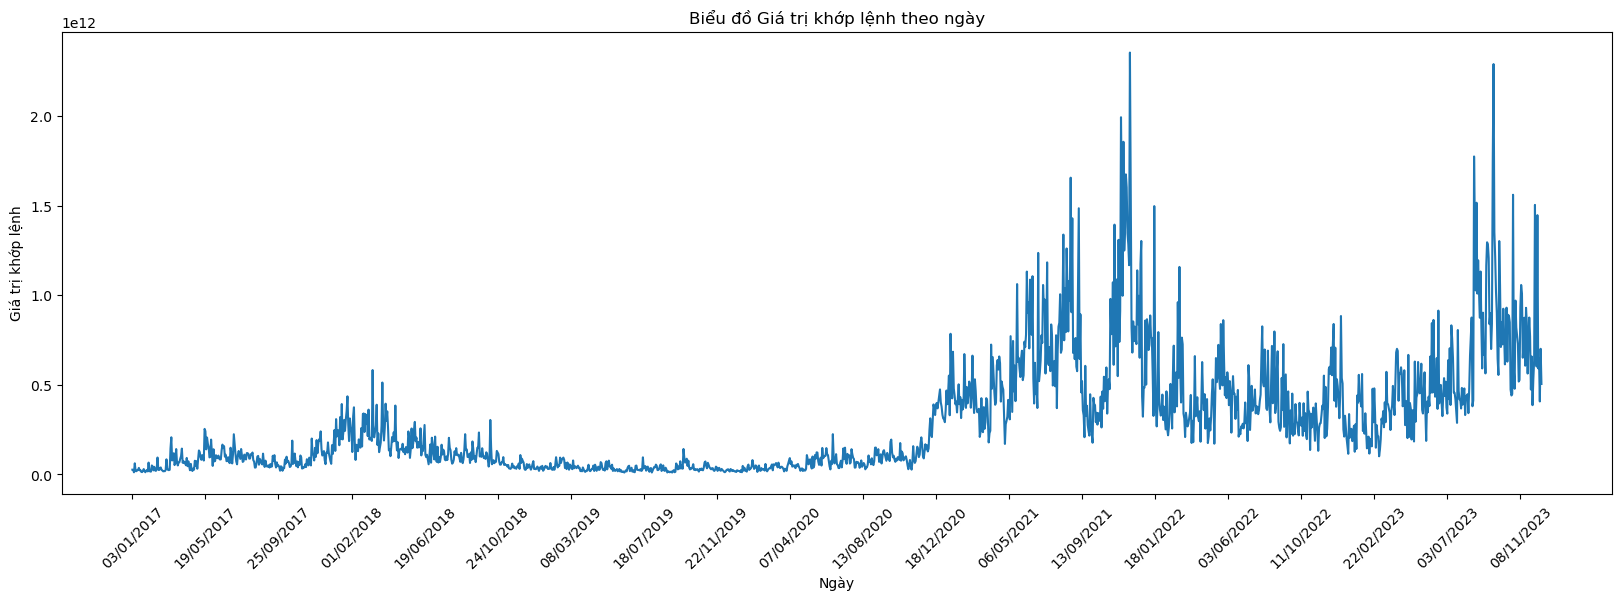

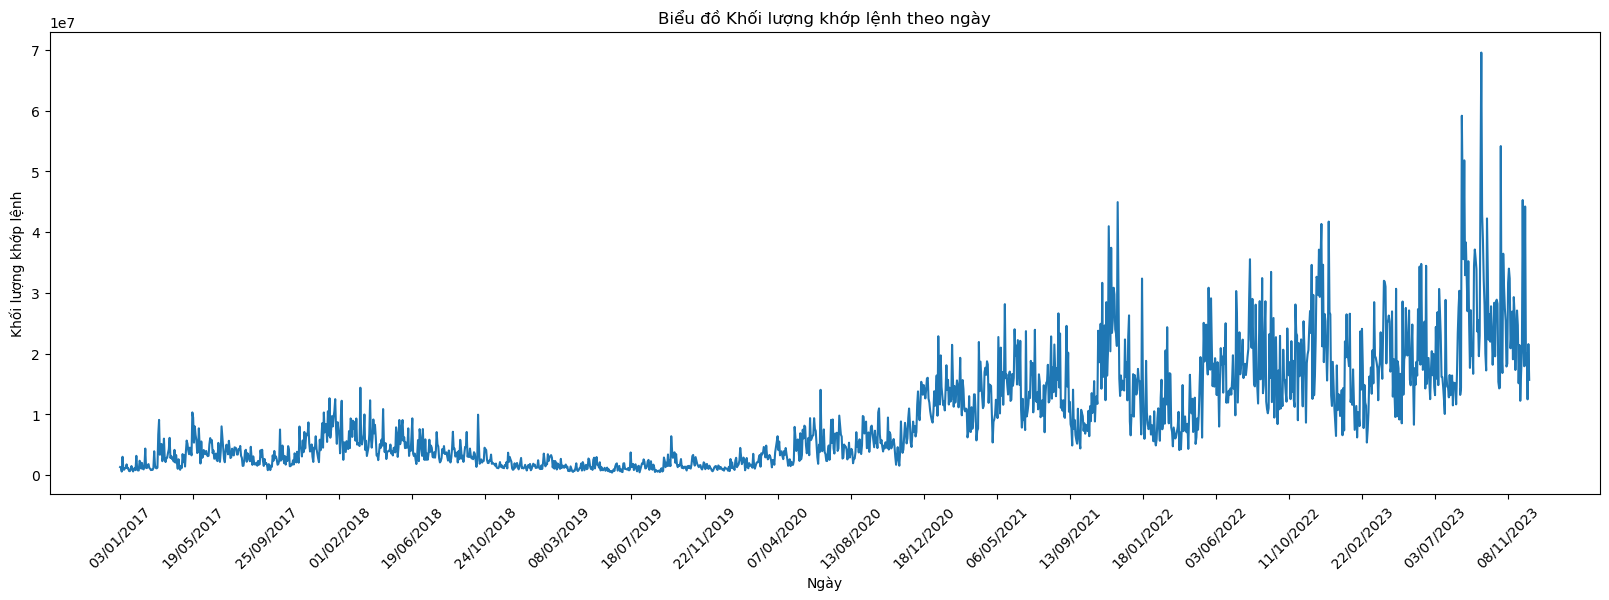

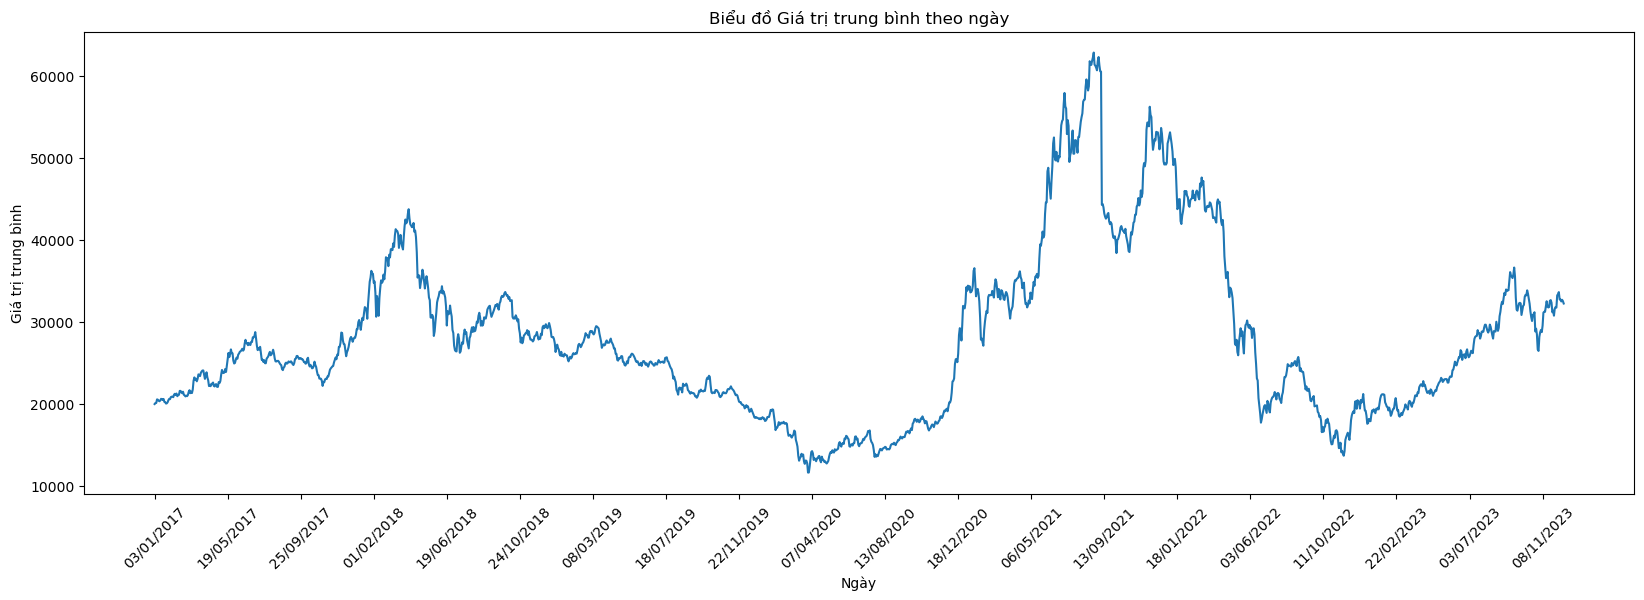

In [28]:
# Lọc các cột dữ liệu cần cho việc quan sát
fixed_df = df[['Ngày', 'Khối lượng khớp lệnh', 'Giá trị khớp lệnh']][::-1]

# Tính toán giá trị trung bình của một cổ phiếu hoặc hợp đồng tài chính theo từng ngày
fixed_df['Giá trị trung bình'] = fixed_df['Giá trị khớp lệnh'] / fixed_df['Khối lượng khớp lệnh']

# Vẽ biểu đồ thể hiện sự biến động của các yếu tố
plt.figure(figsize=(20, 6))
plt.plot(fixed_df['Ngày'], fixed_df['Giá trị khớp lệnh'])
plt.title('Biểu đồ Giá trị khớp lệnh theo ngày')
selected_dates = fixed_df['Ngày'].iloc[::90]  # Chọn mỗi 30 ngày
plt.xticks(selected_dates, rotation=45)
plt.xlabel('Ngày')
plt.ylabel('Giá trị khớp lệnh')
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(fixed_df['Ngày'], fixed_df['Khối lượng khớp lệnh'])
plt.title('Biểu đồ Khối lượng khớp lệnh theo ngày')
plt.xticks(selected_dates, rotation=45)
plt.xlabel('Ngày')
plt.ylabel('Khối lượng khớp lệnh')
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(fixed_df['Ngày'], fixed_df['Giá trị trung bình'])
plt.title('Biểu đồ Giá trị trung bình theo ngày')
plt.xticks(selected_dates, rotation=45)
plt.xlabel('Ngày')
plt.ylabel('Giá trị trung bình')
plt.show()

## Câu hỏi 2:

### 2.1 Nội dung câu hỏi
Sự thay đổi về giá đóng cửa của thị trường qua thời gian.

### 2.2 Lợi ích khi trả lời câu hỏi
- Hiểu biến động theo từng ngày của giá đóng cửa.

### 2.3 Nguồn cảm hứng của câu hỏi
Nhóm tự suy nghĩ trong quá trình khám phá dữ liệu

### 2.4 Cách tìm ra câu trả lời
- Lọc các cột giá trị cần xử lý.
- Vẽ biểu đường thể hiện sự biến động của giá đóng cửa theo từng ngày.

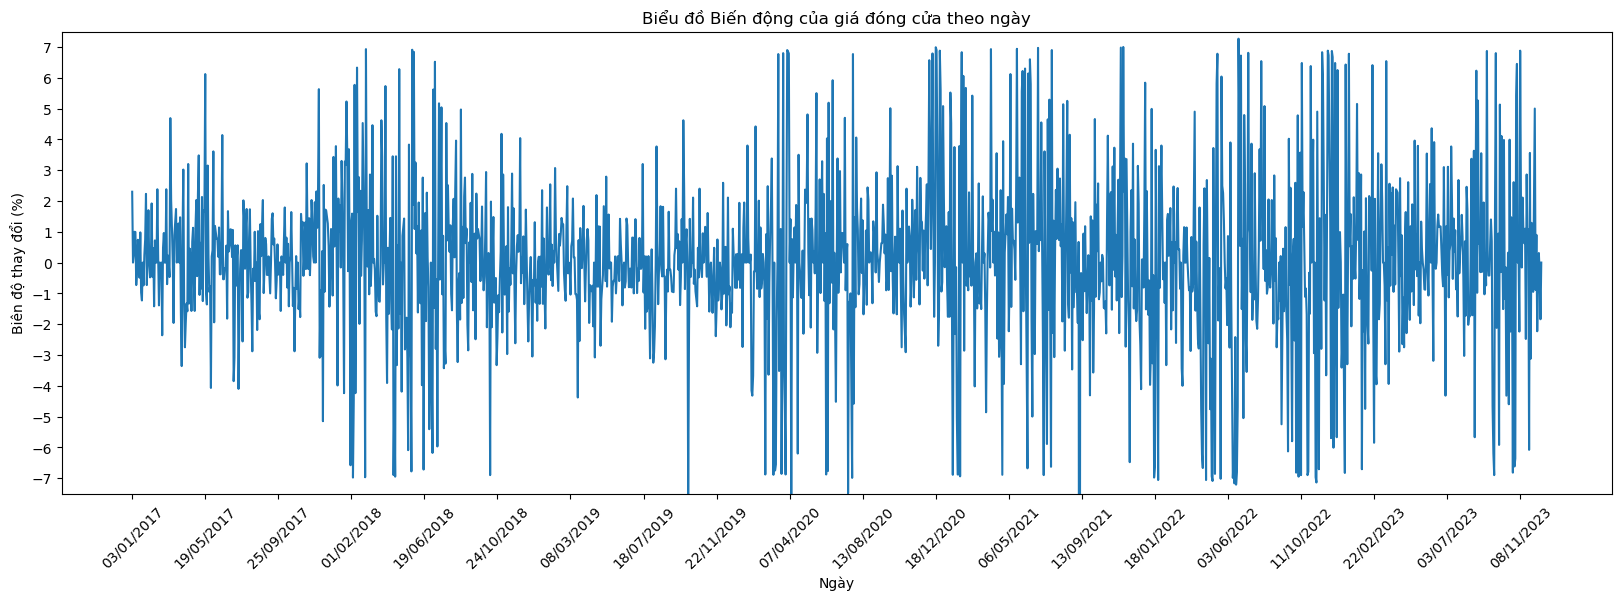

In [43]:
# Lọc các cột dữ liệu cần cho việc quan sát
fixed_df = df[['Ngày', 'Thay đổi']][::-1]

# Xử lý dữ liệu trước khi vẽ
fixed_df['%'] = fixed_df['Thay đổi'].str.extract(r'\((-?[\d.]+)\s*%\s*\)', expand=False).astype(float)

# Vẽ biểu đồ thể hiện sự biến động của các yếu tố
plt.figure(figsize=(20, 6))
plt.plot(fixed_df['Ngày'], fixed_df['%'])
plt.title('Biểu đồ Biến động của giá đóng cửa theo ngày')
selected_dates = fixed_df['Ngày'].iloc[::90]  # Chọn mỗi 30 ngày
plt.xticks(selected_dates, rotation=45)
plt.yticks(np.arange(-8, 9, 1))
plt.ylim(-7.5, 7.5)
plt.xlabel('Ngày')
plt.ylabel('Biên độ thay đổi (%)')
plt.show()

## Câu hỏi 3:

### 3.1 Nội dung câu hỏi
Mối quan hệ giữa giá mở cửa với giá cao nhất và giá thấp nhất.

### 3.2 Lợi ích khi trả lời câu hỏi
- Quan sát xem giá mở cửa có tương quan như thế nào với giá cao nhất và giá thấp nhất

### 3.3 Nguồn cảm hứng của câu hỏi
Nhóm tự suy nghĩ trong quá trình khám phá dữ liệu

### 3.4 Cách tìm ra câu trả lời
- Vẽ biểu đồ đường sự thay đổi của ba thuộc tính.

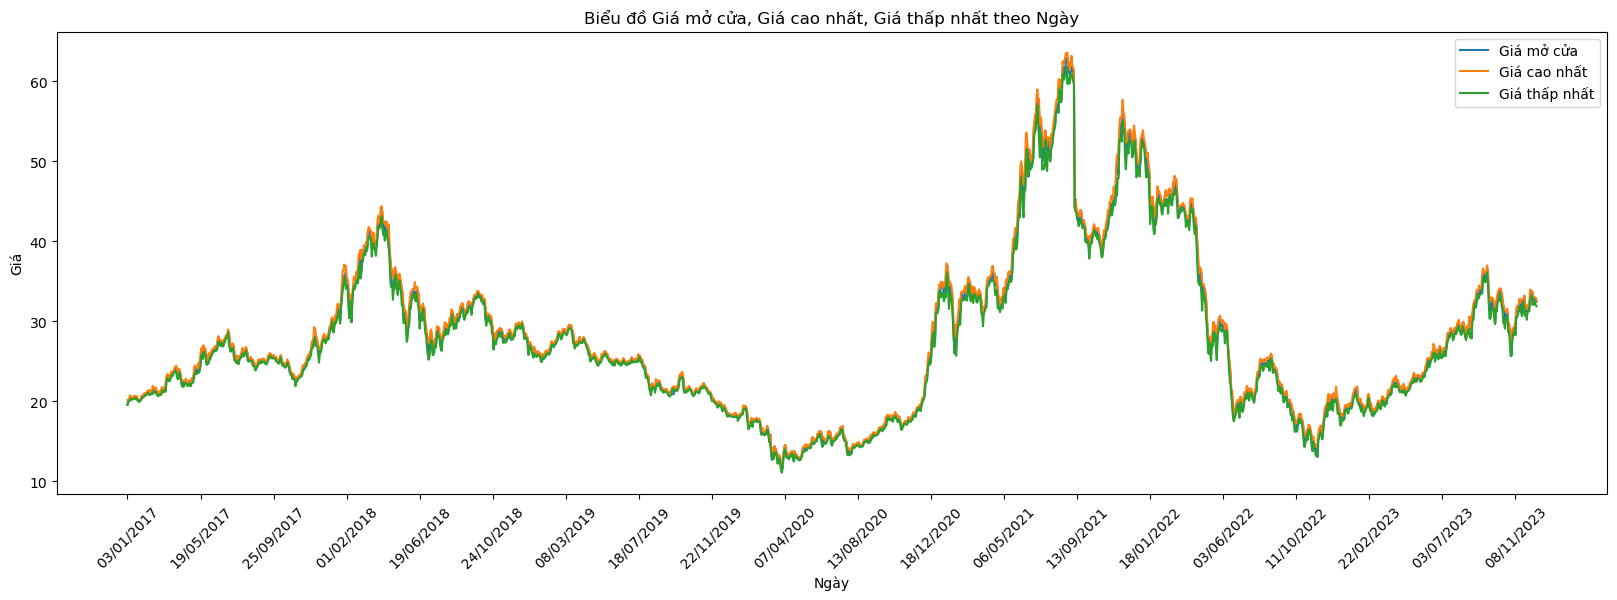

In [45]:
# Lọc các cột dữ liệu cần cho việc quan sát
fixed_df = df[['Ngày', 'Giá mở cửa', 'Giá cao nhất', 'Giá thấp nhất']][::-1]

# Vẽ biểu đồ thể hiện sự biến động của các yếu tố
plt.figure(figsize=(20, 6))
plt.plot(fixed_df['Ngày'], fixed_df['Giá mở cửa'], label='Giá mở cửa')
plt.plot(fixed_df['Ngày'], fixed_df['Giá cao nhất'], label='Giá cao nhất')
plt.plot(fixed_df['Ngày'], fixed_df['Giá thấp nhất'], label='Giá thấp nhất')

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ Giá mở cửa, Giá cao nhất, Giá thấp nhất theo Ngày')
plt.xlabel('Ngày')
plt.ylabel('Giá')
selected_dates = fixed_df['Ngày'].iloc[::90]  # Chọn mỗi 30 ngày
plt.xticks(selected_dates, rotation=45)

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

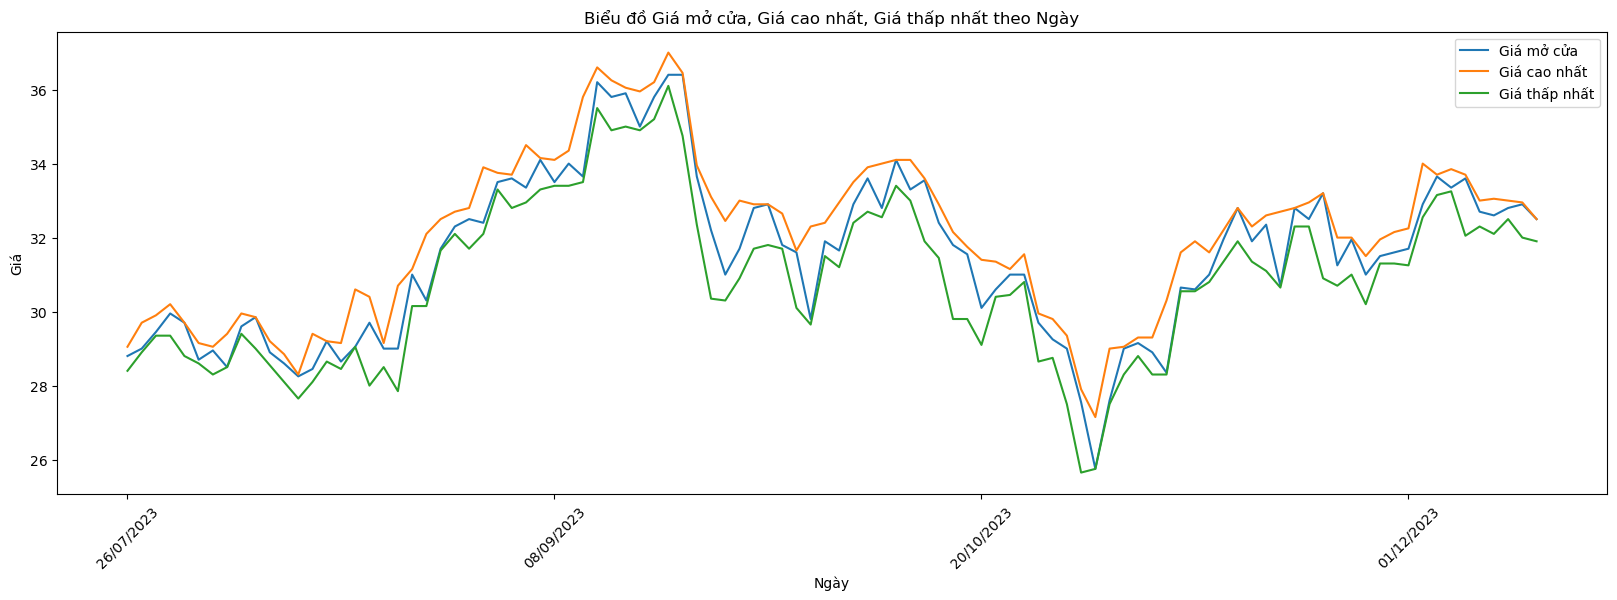

In [51]:
# Để dễ theo dõi sự tách biệt giữa ba giá trị, ta sẽ quan sát một khoảng nhất định, ở đây ta chọn khoảng 3 tháng cuối năm 2023
slice_df = fixed_df.tail(100)

# Vẽ biểu đồ thể hiện sự biến động của các yếu tố
plt.figure(figsize=(20, 6))
plt.plot(slice_df['Ngày'], slice_df['Giá mở cửa'], label='Giá mở cửa')
plt.plot(slice_df['Ngày'], slice_df['Giá cao nhất'], label='Giá cao nhất')
plt.plot(slice_df['Ngày'], slice_df['Giá thấp nhất'], label='Giá thấp nhất')

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ Giá mở cửa, Giá cao nhất, Giá thấp nhất theo Ngày')
plt.xlabel('Ngày')
plt.ylabel('Giá')
selected_dates = slice_df['Ngày'].iloc[::30]  # Chọn mỗi 30 ngày
plt.xticks(selected_dates, rotation=45)

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()